## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [6]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [7]:
dist = pd.DataFrame({'Brown':[sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

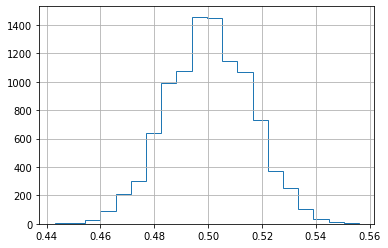

In [9]:
dist.Brown.hist(histtype='step',bins=20)

In [11]:
# p-value is too high to reject the null hypothesis that Green ties or wins
100-scipy.stats.percentileofscore(dist.Brown,0.511)

24.814999999999998

In [12]:
largepoll = pd.read_csv('poll-larger.csv')

In [13]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [17]:
dist = pd.DataFrame({'Green':[sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

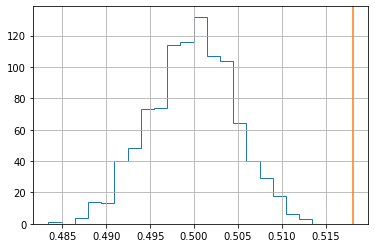

In [18]:
# Confirm p-value for rejecting the null hypothesis that Brown wins or ties is 
# significant
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')